# DataTables Extensions

DataTables comes with a series of [extensions](https://datatables.net/extensions/), which are supported by ITables since v2.0.
A selection of these extensions are included in ITables.

As usual, we activate ITables with:


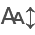

In [1]:
from itables import init_notebook_mode, show

init_notebook_mode()

and then, we create a few example dataframes:

In [2]:
import string

import numpy as np
import pandas as pd

from itables.sample_dfs import get_countries

df = get_countries(html=False)
# Add columns for the searchPanes demo
df["climate_zone"] = np.where(
    df["latitude"].abs() < 23.43615,
    "Tropical",
    np.where(
        df["latitude"].abs() < 35,
        "Sub-tropical",
        # Artic circle is 66.563861 but there is no capital there => using 64
        np.where(df["latitude"].abs() < 64, "Temperate", "Frigid"),
    ),
)
df["hemisphere"] = np.where(df["latitude"] > 0, "North", "South")
wide_df = pd.DataFrame(
    {
        letter: np.random.normal(size=100)
        for letter in string.ascii_lowercase + string.ascii_uppercase
    }
)

```{tip}
The rocket icon at the top of the page will let you run this notebook in Binder!
```

## Buttons

The DataTables [buttons](https://datatables.net/extensions/buttons/) let you copy the table data, or export it as CSV or Excel files.

To display the buttons, you need to pass a `buttons` argument to the `show` function:

In [3]:
show(df, buttons=["copyHtml5", "csvHtml5", "excelHtml5"])

You can also specify a [`layout`](layout) modifier that will decide
the location of the buttons (the default is `layout={"topStart": "buttons"}`). And if
you want to keep the pagination control too, you can add `"pageLength"` to the list of buttons.

As always, it is possible to set default values for these parameters by setting these on `itables.options`. For instance, set
```python
opt.buttons = ["copyHtml5", "csvHtml5", "excelHtml5"]
```
to get the buttons for all tables.


By default, the exported file name is the name of the HTML page. To change it, set a
[`title` option](https://datatables.net/extensions/buttons/examples/html5/filename.html) on the buttons, like
here:

In [4]:
show(
    df,
    buttons=[
        "pageLength",
        {"extend": "csvHtml5", "title": "Countries"},
        {"extend": "excelHtml5", "title": "Countries"},
    ],
)

```{warning}
The PDF button is not included in ITables' DataTable bundle. This is because the required PDF libraries
have a large footprint on the bundle size. Still, you can add it to your custom bundle, see the next chapter.
```

## SearchPanes

[SearchPanes](https://datatables.net/extensions/searchpanes/) is an extension that lets you select rows based on
unique values. In the example below we have activated the cascade filtering through the
[`searchPanes.cascadePanes`](https://datatables.net/extensions/searchpanes/examples/initialisation/cascadePanes.html) argument.
Note that, in Jupyter, the [`searchPanes.layout`](https://datatables.net/extensions/searchpanes/layout)
argument is required (otherwise the search panes are too wide).

In [5]:
show(
    df,
    layout={"top1": "searchPanes"},
    searchPanes={"layout": "columns-3", "cascadePanes": True},
)

```{warning}
When searching, please keep in mind that ITables will [downsample](downsampling.md) your table if it is larger than `maxBytes`,
so you might not see the full dataset - pay attention to the downsampling message at the bottom left of the table.
```

## SearchBuilder

[SearchBuilder](https://datatables.net/extensions/searchbuilder/) let you build complex search queries. You just need to add it to the layout
by passing e.g. `layout={"top1": "searchBuilder"}`.

It is possible to set a predefined search, as we do in the below:

In [6]:
show(
    df,
    layout={"top1": "searchBuilder"},
    searchBuilder={
        "preDefined": {
            "criteria": [
                {"data": "climate_zone", "condition": "=", "value": ["Sub-tropical"]}
            ]
        }
    },
)

## FixedColumns

[FixedColumn](https://datatables.net/extensions/fixedcolumns/) is an extension
that let you fix some columns as you scroll horizontally.

In [7]:
show(
    wide_df,
    fixedColumns={"start": 1, "end": 2},
    scrollX=True,
)

## KeyTable

With the [KeyTable](https://datatables.net/extensions/keytable/) extension you can navigate in a table using the arrow keys:

In [8]:
show(df, keys=True)

```{tip}
You can activate this option for all your tables with

~~~python
import itables.options as opt

opt.keys = True
~~~
```

```{warning}
The KeyTable extension works in Jupyter Book (try it here in the documentation) but not in JupyterLab.
```

## RowGroup

Use the [RowGroup](https://datatables.net/extensions/rowgroup/) extension to group
the data according to the content of one colum. Optionally, you can hide the content
of that column to avoid duplicating the information.

In [9]:
show(
    df.sort_values("region"),
    rowGroup={"dataSrc": 1},
    columnDefs=[{"targets": 1, "visible": False}],
)